In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 10:30:41,395] A new study created in memory with name: no-name-04e47dd0-e3be-4361-9f22-bbf08e22215a
[I 2025-04-27 10:30:43,298] Trial 0 finished with value: 0.9370235934664247 and parameters: {'n_estimators': 479, 'max_depth': 26, 'min_samples_split': 18, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9370235934664247.
[I 2025-04-27 10:30:47,030] Trial 1 finished with value: 0.9509981851179674 and parameters: {'n_estimators': 889, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9509981851179674.
[I 2025-04-27 10:30:51,073] Trial 2 finished with value: 0.947610405323654 and parameters: {'n_estimators': 980, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9509981851179674.
[I 2025-04-27 10:30:52,711] Trial 3 finished with value: 0.9405323653962492 and parameters: {'n_estimators': 400, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 4}. Best is trial 1 with va

Best trial:
Accuracy: 0.9617059891107077
Best hyperparameters:  {'n_estimators': 770, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 3}


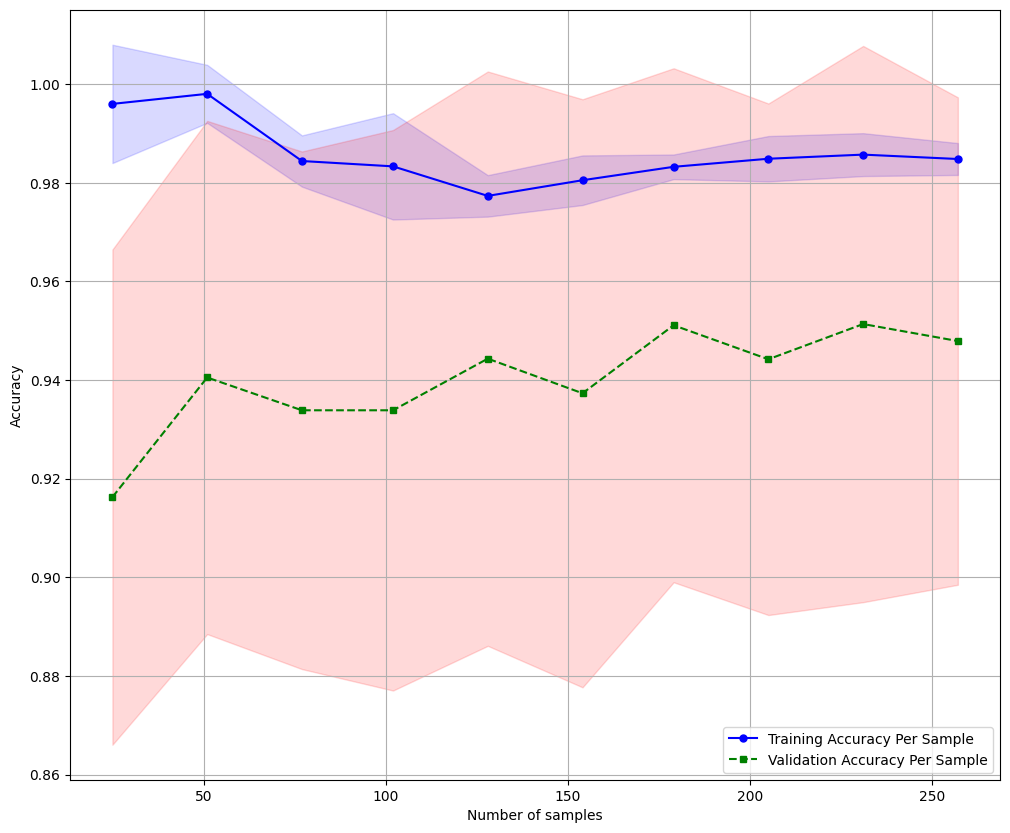

Confusion Matrix
[[ 57   7]
 [  3 104]]
Accuracy: 0.9415, Precision: 0.9369, Recall: 0.9720, F1: 0.9541, AUC: 0.9907


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', outlier_params)

helper.train_and_evaluate_model('rf', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)